In [1]:
# !nvidia-smi

# Download data from Goolge Drive

In [2]:
import gdown
import zipfile

In [1]:
url = " "

In [ ]:
file_id = url.split("/")[-2]
file_id

In [1]:
# prefix = 'https://drive.google.com/uc?/export=download&id='
# gdown.download(prefix + file_id, 'garbage.zip')

In [6]:
zip_path = "/content/garbage.zip"
extract_path = ""

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")

Extraction complete!


# Importing necessary libraries

In [7]:
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
# import cv2
# import imghdr
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Cleaning

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

base_dir = "garbage"

def check_image_formats(base_dir, valid_exts):
    all_images_valid = True
    invalid_images = []

    for sub_dir in os.listdir(base_dir):
        sub_dir_path = os.path.join(base_dir, sub_dir)
        if not os.path.isdir(sub_dir_path):
            continue

        for file_name in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path, file_name)

            if os.path.isdir(file_path):
                continue

            file_ext = file_name.split('.')[-1].lower()
            if file_ext not in valid_exts:
                all_images_valid = False
                invalid_images.append(file_path)

    if all_images_valid:
        print("All images are in the specified formats.")
    else:
        print("The following images are not in the specified formats:")
        for img in invalid_images:
            print(img)

check_image_formats(base_dir, image_exts)


All images are in the specified formats.


In [9]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "garbage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 15515 files belonging to 12 classes.


In [11]:
class_names = dataset.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

In [12]:
len(dataset)
# 97*32

485

# Basic EDA

In [13]:
data_dir = "garbage"
name = []
length = []
# len_list = []
for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))

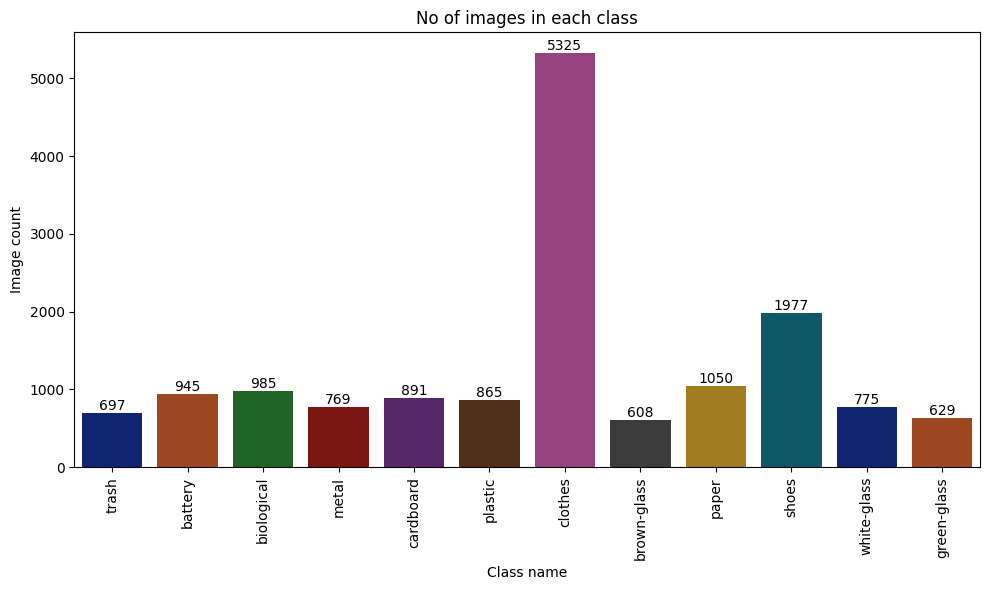

In [14]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### from the above plot we can clearly see data is imblanced.

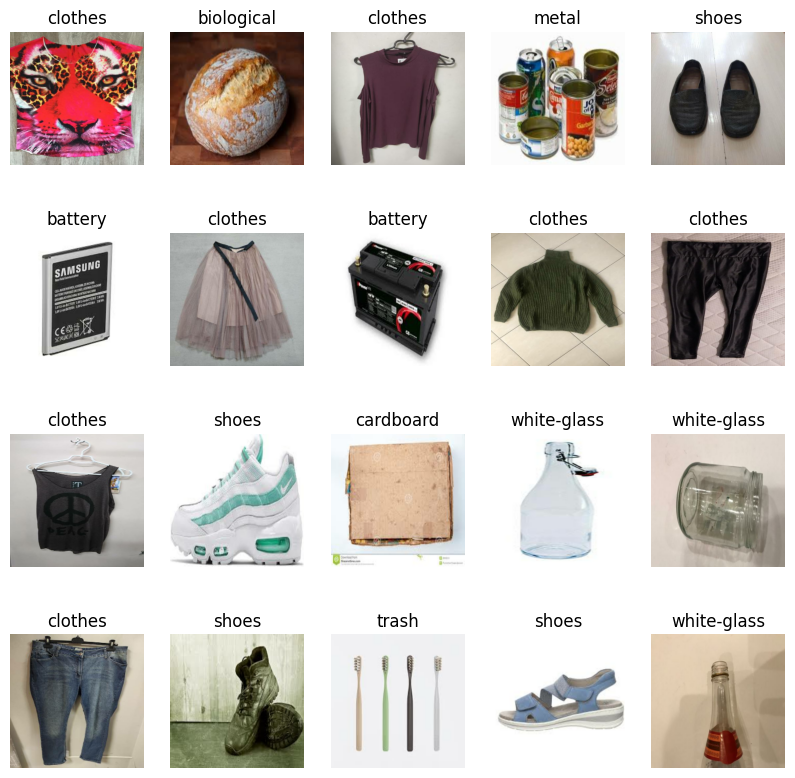

In [15]:
plt.figure(figsize=(10,10))

for img_batch, label in dataset.take(1):
  for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(img_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [16]:
# len(dataset) * 0.80

In [17]:
# train_ds = dataset.take(388)
# len(train_ds)

In [18]:
# test_ds = dataset.skip(388)
# len(test_ds)

In [19]:
# val_size = 0.1
# len(dataset) * val_size

In [20]:
# val_ds = test_ds.take(48)
# len(val_ds)

In [21]:
# test_ds = test_ds.skip(48)
# len(test_ds)

# Split the data

In [22]:
def split_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds = split_dataset(dataset)

In [24]:
print(f"training data : {len(train_ds)}")
print(f"validation data : {len(val_ds)}")
print(f"testing data : {len(test_ds)}")

training data : 388
validation data : 48
testing data : 49


In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Preprocessing

In [26]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, CHANNELS),
    layers.Rescaling(1.0/255)
])

In [27]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [28]:
# data_dir = " "

In [29]:
# bio_img = os.listdir(data_dir + 'biodegradable/')
# non_bio_img = os.listdir(data_dir + 'nonbiodegradable/')


# print(f"biodegradable garbage images : {len(bio_img)}")
# print(f"nonbiodegradable garbage images : {len(non_bio_img)}")

In [30]:
# image_exts = ['jpeg','jpg','bmp','png']

# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         img_path = os.path.join(data_dir, image_class, image)
#         try:
#             img = cv2.imread(img_path)
#             tip = imghdr.what(img_path)
#             if tip not in image_exts:
#                 print('img not in ext list {}'.format(img_path))
#                 os.remove(img_path)
#         except:
#             print('Issue with image {}'.format(img_path))

In [31]:
# ax = sns.barplot(x=['biodegradable images','nonbiodegradable images'],
#             y=[len(bio_img),len(non_bio_img)],palette='dark:#5A9_r')

# for i in ax.containers:
#     ax.bar_label(i)

# plt.show()

In [32]:
# selected_imges = random.sample(bio_img,5)

# fig,axes=plt.subplots(1,5,figsize=(25,5))

# for i, path in enumerate(selected_imges):
#     img = Image.open(data_dir + 'biodegradable/' + path)
#     axes[i].imshow(img)
#     axes[i].axis('off')

# # plt.title("Biodegradable Images")
# plt.tight_layout()
# plt.show()

In [33]:
# selected_imges = random.sample(non_bio_img,5)

# fig,axes = plt.subplots(1,5,figsize=(25,5))
# for i, path in enumerate(selected_imges):
#     img = Image.open(data_dir + 'nonbiodegradable/' + path)
#     axes[i].imshow(img)
#     axes[i].axis('off')

# # plt.title("Non-biodegradable Images")
# plt.tight_layout()
# plt.show()

In [34]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Flatten, Dense, Dropout
# from tensorflow.keras.applications.vgg19 import VGG19
# from tensorflow.keras.optimizers import SGD, Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [35]:
# from tqdm import tqdm
# def augmented_data(file_dir, n_gen, save_dir):
#     data_gen = ImageDataGenerator(rotation_range=10,
#                       shear_range=0.2,
#                       zoom_range=0.2,
#                       horizontal_flip=True,
#                       vertical_flip=True,
#                       width_shift_range=0.2,
#                       height_shift_range=0.2,
#                       fill_mode='nearest')

#     total_generated = 0

#     for filename in tqdm(os.listdir(file_dir)):
#         if total_generated >= n_gen:
#             break

#         image = cv2.imread(file_dir + '/' + filename)
#         image = image.reshape((1,) + image.shape)
#         save_prefix = 'aug_' + filename[:-4]
#         i=0
#         for batch in data_gen.flow(x = image, batch_size=1,save_to_dir=save_dir,save_prefix=save_prefix,save_format="jpg"):
#             i+=1
#             total_generated += 1
#             if i>=1 or total_generated >= n_gen:
#                 break
#     print(f"Total images generated: {total_generated}")


In [36]:
# new_non_bio_path = '/kaggle/working/Garbage Classification/nonbiodegradable'
# os.makedirs(new_non_bio_path, exist_ok=True)
# non_bio_path = '/kaggle/input/d/gauravbosamiya/garbage-classification/Garbage Classification/nonbiodegradable'
# augmented_data(file_dir=non_bio_path, n_gen=2971, save_dir=new_non_bio_path)